In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
ds=pd.read_csv('Salary.csv')
ds_PS=pd.read_csv('Position_Salaries.csv')
ds_SD=pd.read_csv('SalaryData.csv')

In [ ]:
ds

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


In [ ]:
ds_PS

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
ds_SD

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


In [ ]:
ds.head(5)

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [ ]:
# Checking null values

ds.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
# EDA (row,column etc)

ds.info()

ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


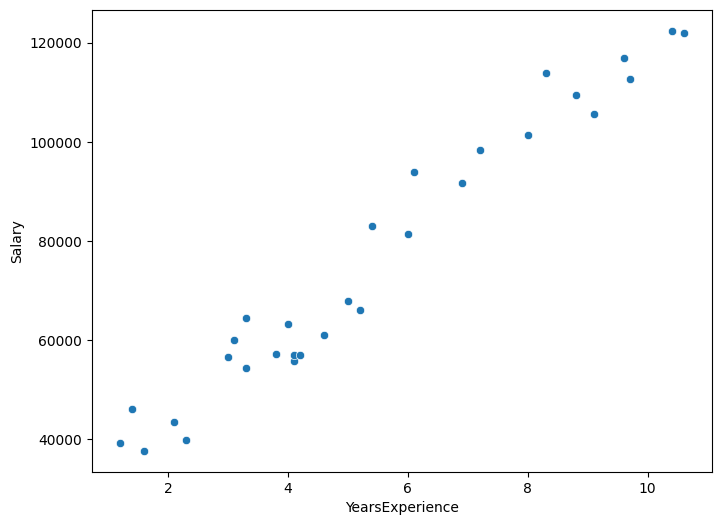

In [ ]:
#plotting data
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsExperience',y='Salary',data=ds)
plt.show()

In [ ]:
#y=mx+c
#m=slope
#c=intercept

x_minus_x_bar=ds['YearsExperience']-ds['YearsExperience'].mean()
y_minus_y_bar=ds['Salary']-ds['Salary'].mean()
(x_minus_x_bar*y_minus_y_bar).sum()

2207082.8

In [ ]:
x_minus_x_bar_square=(x_minus_x_bar*x_minus_x_bar).sum()
x_minus_x_bar_square

233.5546666666667

In [ ]:
#finding value of m

m=(x_minus_x_bar*y_minus_y_bar).sum()/x_minus_x_bar_square
m

9449.962321455076

In [ ]:
#finding value of c

c=ds['Salary'].mean()-(m*ds['YearsExperience'].mean())
c

24848.2039665232

In [ ]:
y=m*ds['YearsExperience']+c
#y=m*1.4+c
y

,YearsExperience
0,36188.158752
1,38078.151217
2,39968.143681
3,44693.124842
4,46583.117306
5,53198.090931
6,54143.087163
7,56033.079627
8,56033.079627
9,60758.060788


In [ ]:
#now to do with functions above is done manually

x=ds['YearsExperience'] #independant variable
y=ds['Salary']  #dependant variable

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
lr=LinearRegression()

In [ ]:
x_train=pd.DataFrame(x_train)
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.predict([[1.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39326.72607425])

In [ ]:
x_test=pd.DataFrame(x_test)
lr.score(x_test,y_test)*100

97.30870038390529

In [ ]:
#slope or value of m
#value is positive angle less than 90
lr.coef_

array([9236.40942727])

In [ ]:
#value of c
#c is positive if line touhes above point(0,0)
lr.intercept_

26395.75287606493

In [ ]:
x=pd.DataFrame(x)
y_pred=lr.predict(x)

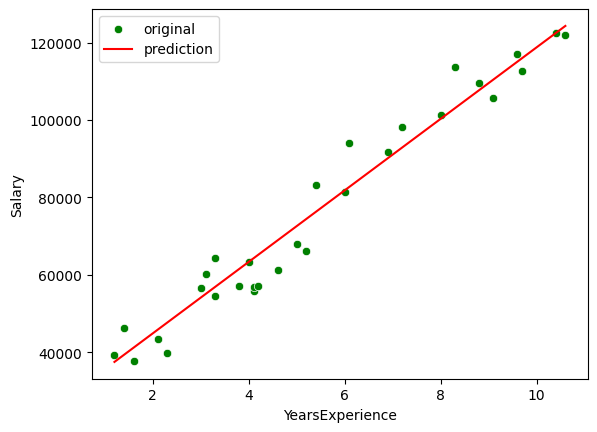

In [ ]:
# make plot to check predicted line

sns.scatterplot(x='YearsExperience',y='Salary',data=ds,color='green')
plt.plot(ds['YearsExperience'],y_pred,color='red')
plt.legend(["original","prediction"])
plt.show()

In [ ]:
ds_SD

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0
